# Example of training

## Imoports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os

while 'notebooks' in os.getcwd():
    os.chdir("../")

In [2]:
import robbytorch as robby

from hydra_lightning.train import load_from_config, load_config, config_to_yaml

## Choose experiment

In [3]:
experiment = 'example/standard_resnet_robust_train'
# experiment = 'example/standard_resnet'

resume_from_checkpoint = False
epochs = 100 if resume_from_checkpoint else 60
wandb_run_id = '9d433aze' if resume_from_checkpoint else 'null'  # for robust_train
wandb_artifact_path = f"portal/dl_template_example/model-{wandb_run_id}:v0"  # for robust_train

## Load config

In [4]:
cfg = load_config(overrides=[
    f"experiment={experiment}",
    "gpus=[6]",
    f"epochs={epochs}",
    f"logger.wandb.id={wandb_run_id}" # to resume a run, last element of `run_path` in wandb
])
print(config_to_yaml(cfg))
trainer, module, datamodule = load_from_config(cfg)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: portal (use `wandb login --relogin` to force relogin)


img_shape:
- 224
- 224
task:
  run_name: standard_resnet_robust_train
  name: example
seed: null
gpus:
- 6
epochs: 60
datamodule:
  _target_: hydra_lightning.tasks.example.datamodules.default.DefaultDataModule
  dataloader_spec:
    batch_size: 64
    num_workers: 32
    prefetch_factor: 2
    persistent_workers: true
    pin_memory: false
  val_dataloader_spec_override: null
  transform_factory:
    _target_: lib.transform_factories.DefaultTransformFactory
    shape:
      _target_: lib.utils.to_tuple
      seq:
      - 224
      - 224
  augmentation_factory:
    _target_: lib.transform_factories.DefaultAugmentationFactory
module:
  optimizer_spec:
    id: Adam
    params:
      .backbone:
        lr: 1.0e-05
      .head:
        lr: 0.0001
    weight_decay: 0.01
  scheduler_spec:
    id: StepLR
    step_size: 20
    gamma: 0.7
  _target_: hydra_lightning.tasks.example.modules.resnet_robust_train.ResnetRobustTrainModule
  model_config:
    arch: resnet18
    eps: 0.0
    num_classes: 

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Instantiating trainer <pytorch_lightning.Trainer>
Instantiating module <hydra_lightning.tasks.example.modules.resnet_robust_train.ResnetRobustTrainModule>
Instantiating datamodule <hydra_lightning.tasks.example.datamodules.default.DefaultDataModule>


## Train

In [5]:
if resume_from_checkpoint:
    import wandb
    artifact = wandb.use_artifact(wandb_artifact_path, type='model')
    artifact_dir = artifact.download()

    ckpt_path = artifact.file
    # module2 = module.load_from_checkpoint(artifact.file()) # loading module from checkpoint

    trainer.fit(model=module, datamodule=datamodule, ckpt_path=artifact.file())
else:
    trainer.fit(model=module, datamodule=datamodule)

wandb: Downloading large artifact model-1j2xhroe:v0, 128.05MB. 1 files... Done. 0:0:0
Restoring states from the checkpoint path at ./artifacts/model-1j2xhroe:v0/model.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/opt/tljh/user/envs/dl_template/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:247: UserWarning: You're resuming from a checkpoint that ended mid-epoch. Training will start from the beginning of the next epoch. This can cause unreliable results if further training is done, consider using an end of epoch checkpoint.
  rank_zero_warn(
Restored all states from the checkpoint file at ./artifacts/model-1j2xhroe:v0/model.ckpt

  | Name                    | Type             | Params
-------------------------------------------------------------
0 | cross_entropy_criterion | CrossEntropyLoss | 0     
1 | train_accuracy          | Accuracy         | 0     
2 | std_val_accuracy        | Accuracy         | 0     
3 | adv_val_accurac

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

# Visualize data

In [6]:
dataitem = next(iter(datamodule.train_dataloader()))
batch = dataitem["data"]

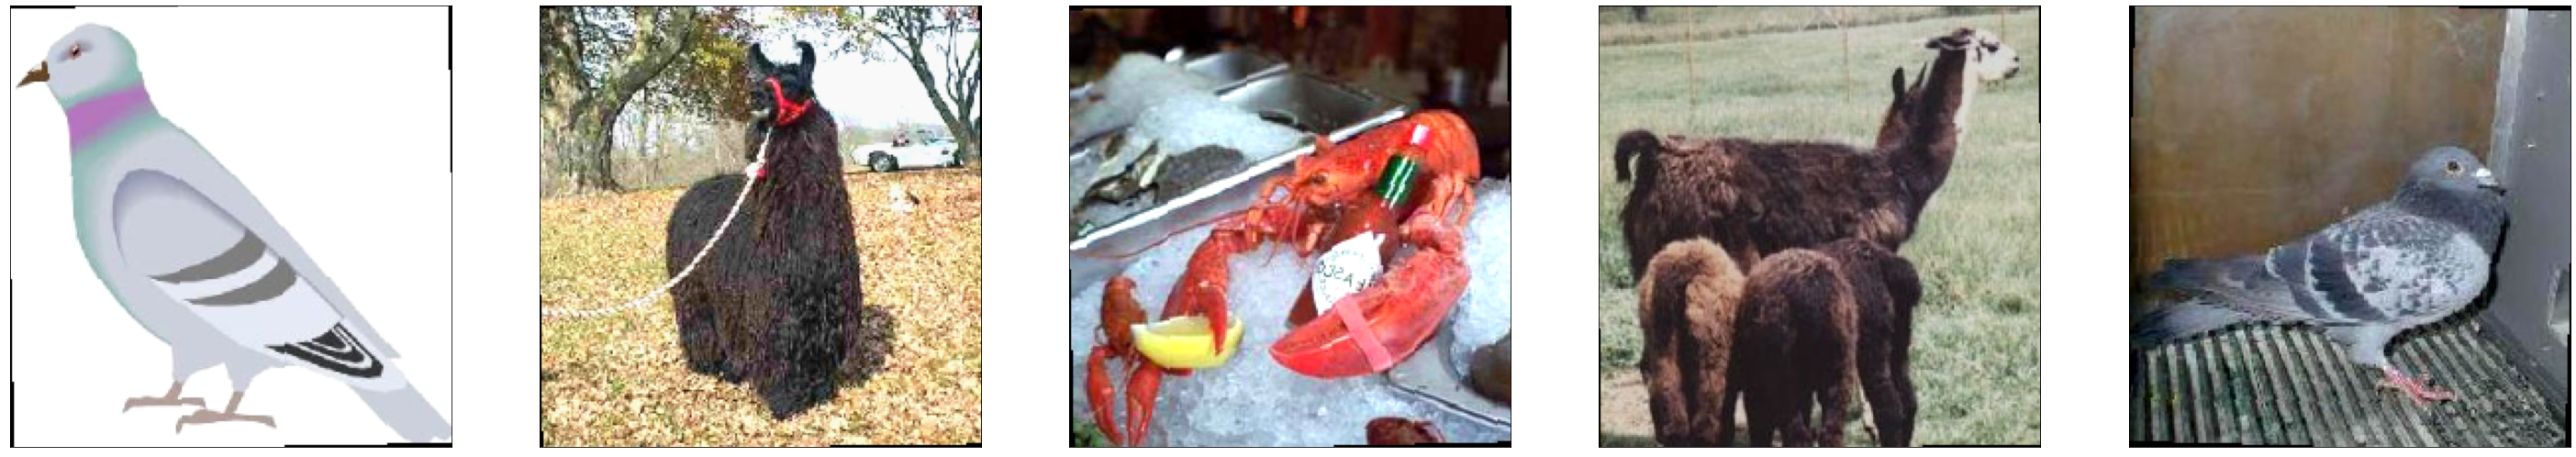

In [7]:
robby.get_image_table(batch[:5], size=(10,10))
pass